In [5]:
%pylab inline
import numpy as np
import hurst
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


# Analyze S&P 500

Text(0.5, 1.0, 'S&P 500 closing prices from 1989-07-13 to 2019-08-02')

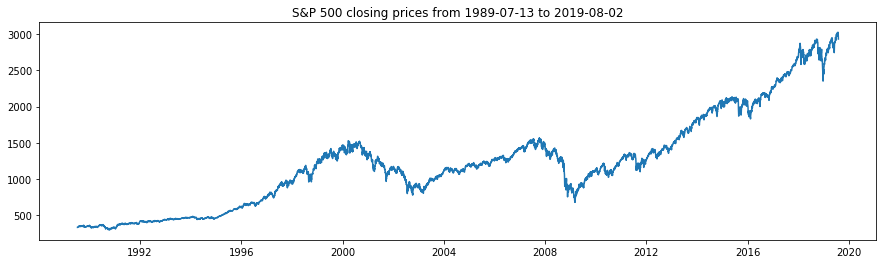

In [7]:
data = pd.read_csv("S&P 500.csv", sep=";", converters={0: lambda x: datetime.strptime(x, "%Y-%m-%d")})
data = data.set_index('Date')

fig, ax = subplots(figsize=(15,4))

ax.plot(data.index, data["Close"], label="Closing prices")
plt.title("S&P 500 closing prices from {} to {}".format(data.index[0].strftime("%Y-%m-%d"), 
                                                      data.index[-1].strftime("%Y-%m-%d")))

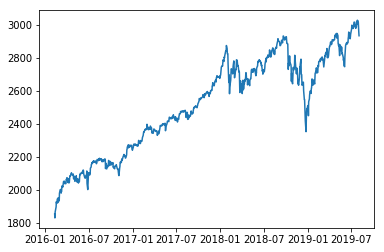

In [16]:
closing = data["Close"]["2016-02-10":]
plot(closing)

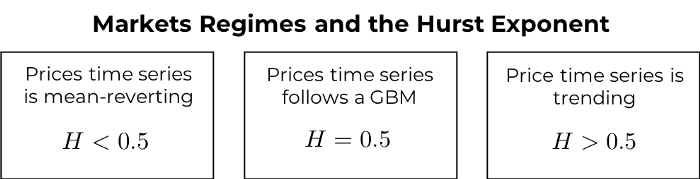

==> ACHTUNG FEHLER: H=0.5 ==> Path follows a Brownian Motion

H=0.694, c=0.781


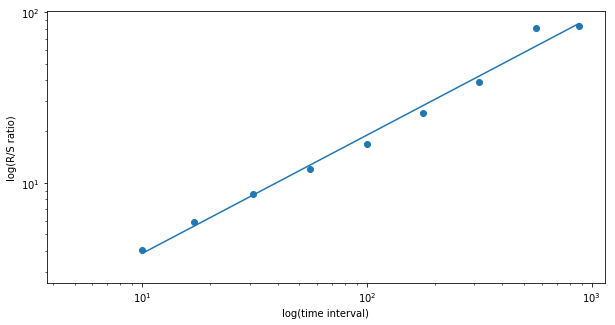

In [17]:
H, c, result = hurst.compute_Hc(closing, kind='price', simplified=True)

plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H,c))

# Brownian Motion

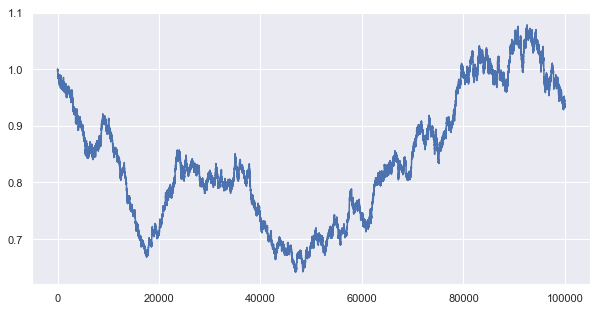

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk
import seaborn as sns

random_changes = 1. + np.random.randn(99999) / 1000.
series = np.cumprod(random_changes)  

plot(series)

H=0.566, c=1.071


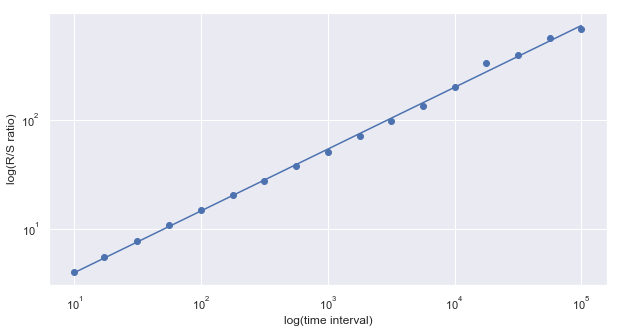

In [77]:
H, c, result = compute_Hc(series, kind='price', simplified=True)

plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H,c))

# Geometric Brownian Motion

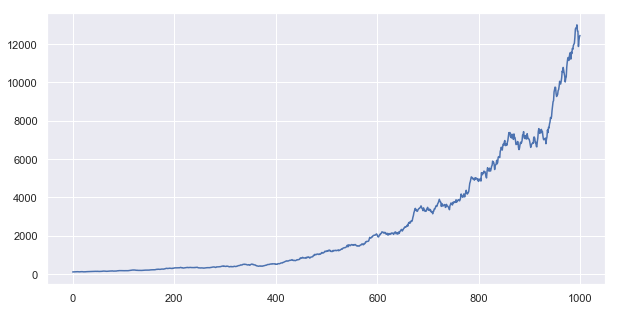

In [86]:
mu=5
sigma=0.7
n=1000

dt=1/n
x0=100
x=pd.DataFrame()

step=np.exp((mu-sigma**2/2)*dt)*np.exp(sigma*np.random.normal(0, np.sqrt(dt), (1,n)))
gbm=pd.Series(data=x0*step.cumprod())

plt.plot(gbm)

H=1.407, c=0.093


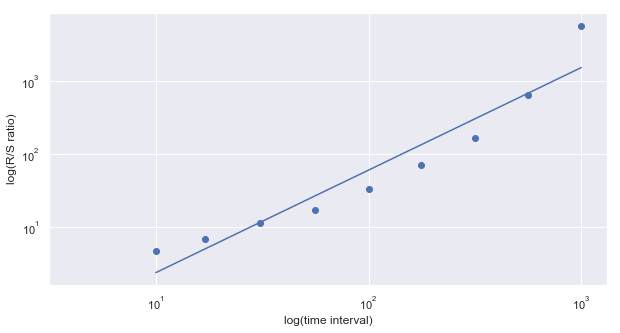

In [87]:
H, c, result = hurst.compute_Hc(gbm, kind='price', simplified=True)

plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H,c))

# Mean reverting process

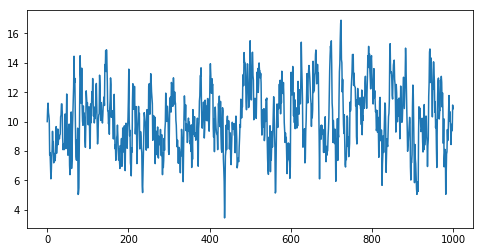

In [62]:
sigma = 2.  # Standard deviation.
mu = 10.  # Mean.
tau = .005  # Time constant.

dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

x0 = 10
mr = [x0]

for i in range(n):
    mr_t = mr[-1] + dt * (-(mr[-1] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn()
    mr.append(mr_t)
    
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(mr)

H=0.407, c=1.847


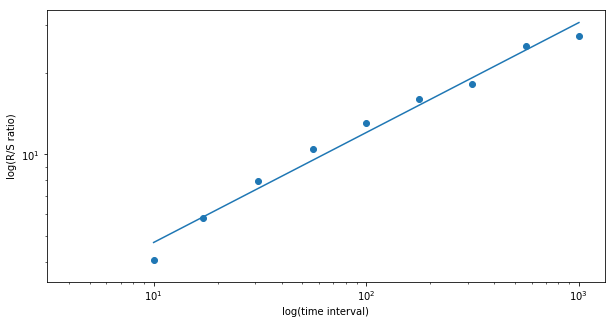

In [63]:
H, c, result = hurst.compute_Hc(mr, kind='price', simplified=True)

plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H, c))